# 1.Importing libraries

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Creating dataframe

In [19]:
# Loading the dataset
df = pd.read_csv('kaggle_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


# 3. Data Preprocessing

### A. Observing Dataframe
### B. Data Cleaning
### C.Data Reduction
### D.Data Transformation
### E.Data Encoding

In [98]:
# Calculating mean of df
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [23]:
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head() #printing first 5 entries of dataframe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [24]:
# Printing Shape of dataframe
print("Shape of Dataframe:",np.shape(df))

Shape of Dataframe: (2000, 9)


In [31]:
# Printing detail information of dataframe
dinfo = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2000 non-null   int64  
 1   Glucose        2000 non-null   int64  
 2   BloodPressure  2000 non-null   int64  
 3   SkinThickness  2000 non-null   int64  
 4   Insulin        2000 non-null   int64  
 5   BMI            2000 non-null   float64
 6   DPF            2000 non-null   float64
 7   Age            2000 non-null   int64  
 8   Outcome        2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [88]:
diabetes_df_copy = df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
nullvalues=diabetes_df_copy.isnull().sum()
print(nullvalues)

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64


In [34]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.0,NaN,NaN,31.2,0.382,42,0
1998,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [35]:
 #Replacing NaN value by mean, median depending upon distribution
    
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.000000,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.000000,29.0,126.0,31.2,0.382,42,0
1998,0,129.0,110.000000,46.0,130.0,67.1,0.319,26,1


# 4. Training and Testing of Data

In [8]:
# Training and testing of Data
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("Shape of training and Testing is:",np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))

Shape of training and Testing is: (1600, 8) (400, 8) (1600,) (400,)


 # 5. Model Building

In [12]:
# Model Building
# Creating Random Forest Model

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
model = classifier.fit(X_train, y_train)

# 6. Model Evaluating

In [13]:
# Checking Accuracy of Model
print("Random Forest Score:", model.score(X_train,y_train))

Random Forest Score: 1.0


In [102]:
#  Output: Accuracy = 1.0

#  So here we can see that on the training dataset our model is overfitted.

## Getting the accuracy score for Random Forest

from sklearn import metrics

predictions = classifier.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.99


# Data Visualization

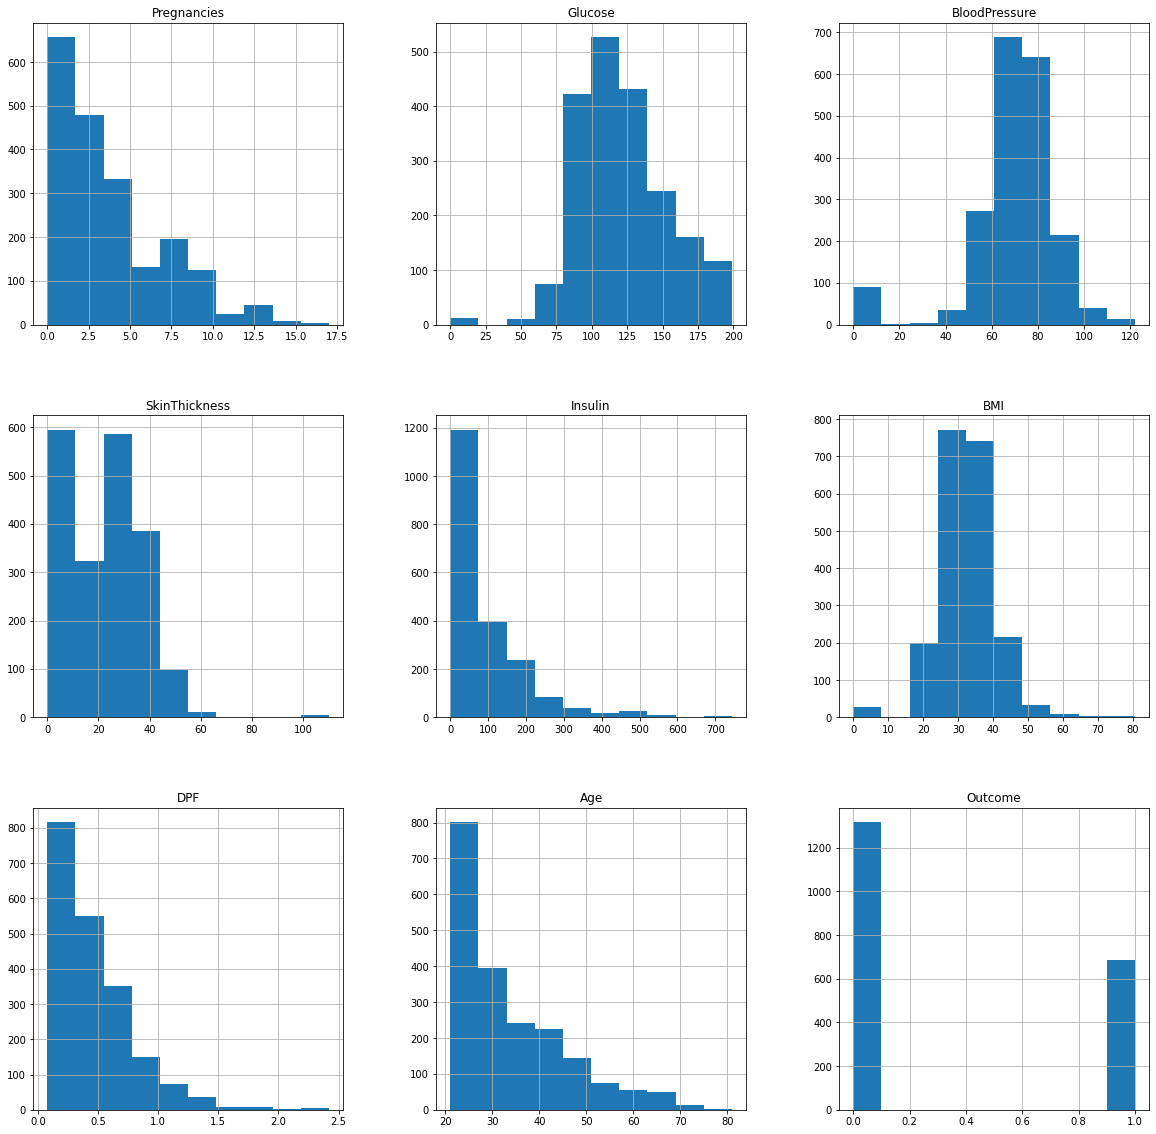

In [82]:
# Plotting the data distribution plots before removing null values

p = df.hist(figsize = (20,20))

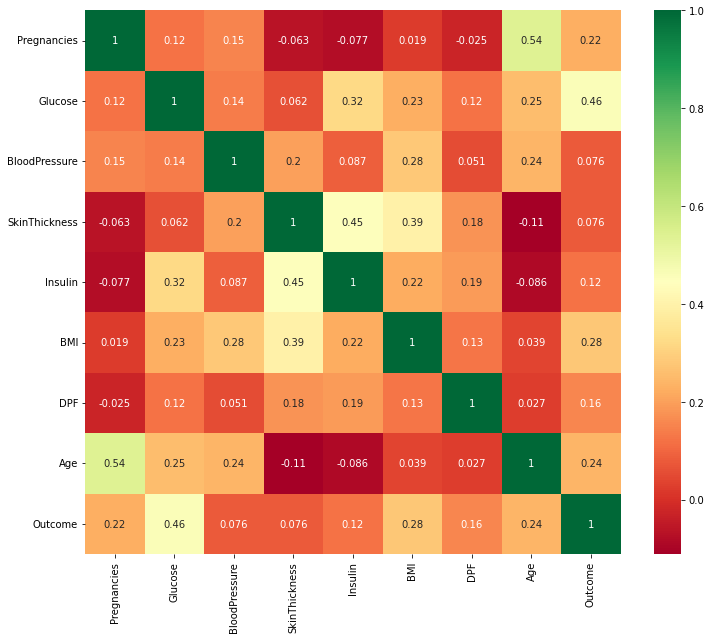

In [97]:
# Correlation between all the features
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

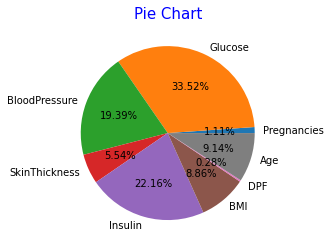

In [77]:
# Pie Chart
names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DPF','Age']
mean_value = [4,121,70,20,80,32,1,33]
plt.pie(mean_value,labels=names,autopct='%1.2f%%')
font1 = {'color':'Blue','size':15}
plt.title('Pie Chart',fontdict = font1)
plt.show()


# 7.Saving Model

In [10]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-rfc-model.pkl'